In [44]:
import pandas as pd
import json

In [45]:
# Load the JSON file
file_path = 'stock_data_AAPL_21,aug,23-23,aug,23.json'
with open(file_path, 'r') as file:
    data = json.load(file)

In [46]:
# Extract AAPL data
aapl_data = data['AAPL']

# Convert to DataFrame
df = pd.DataFrame(aapl_data)
df.head()

,datetime,open,high,low,close,volume
0,2021-09-01 15:59:00,152.48500,152.56000,152.46001,152.53999,931601
1,2021-09-01 15:58:00,152.45990,152.50000,152.42999,152.49001,543902
2,2021-09-01 15:57:00,152.45000,152.47000,152.39999,152.46001,369612
3,2021-09-01 15:56:00,152.44000,152.47000,152.42000,152.44000,387669
4,2021-09-01 15:55:00,152.42999,152.46001,152.38499,152.44000,520909


In [42]:
# Convert 'datetime' column to datetime object and set as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.head()

,open,high,low,close,volume
datetime,,,,,
2021-09-01 15:59:00,152.48500,152.56000,152.46001,152.53999,931601
2021-09-01 15:58:00,152.45990,152.50000,152.42999,152.49001,543902
2021-09-01 15:57:00,152.45000,152.47000,152.39999,152.46001,369612
2021-09-01 15:56:00,152.44000,152.47000,152.42000,152.44000,387669
2021-09-01 15:55:00,152.42999,152.46001,152.38499,152.44000,520909


In [47]:
####

import pandas as pd

# Convert 'datetime' column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index
df.set_index('datetime', inplace=True)

# Convert the index to UTC timezone
df.index = df.index.tz_localize('UTC')

# Convert the index to the market's timezone
df.index = df.index.tz_convert('America/New_York')

# Resample to 1-minute intervals
df_resampled = df.resample('1T').asfreq()

# Filter market hours (9:30 to 16:00)
df_market_hours = df_resampled.between_time('09:30', '16:00')
df_market_hours.head()

,open,high,low,close,volume
datetime,,,,,
2021-08-23 09:30:00-04:00,149.70000,149.74001,149.69000,149.74001,85244
2021-08-23 09:31:00-04:00,149.74001,149.75000,149.72000,149.73000,62853
2021-08-23 09:32:00-04:00,149.73000,149.75000,149.73000,149.75000,58376
2021-08-23 09:33:00-04:00,149.78000,149.80000,149.78000,149.78999,90230
2021-08-23 09:34:00-04:00,149.80000,149.80000,149.78000,149.78000,94710


Missing values distribution:
open      220363
high      220363
low       220363
close     220363
volume    220363
dtype: int64


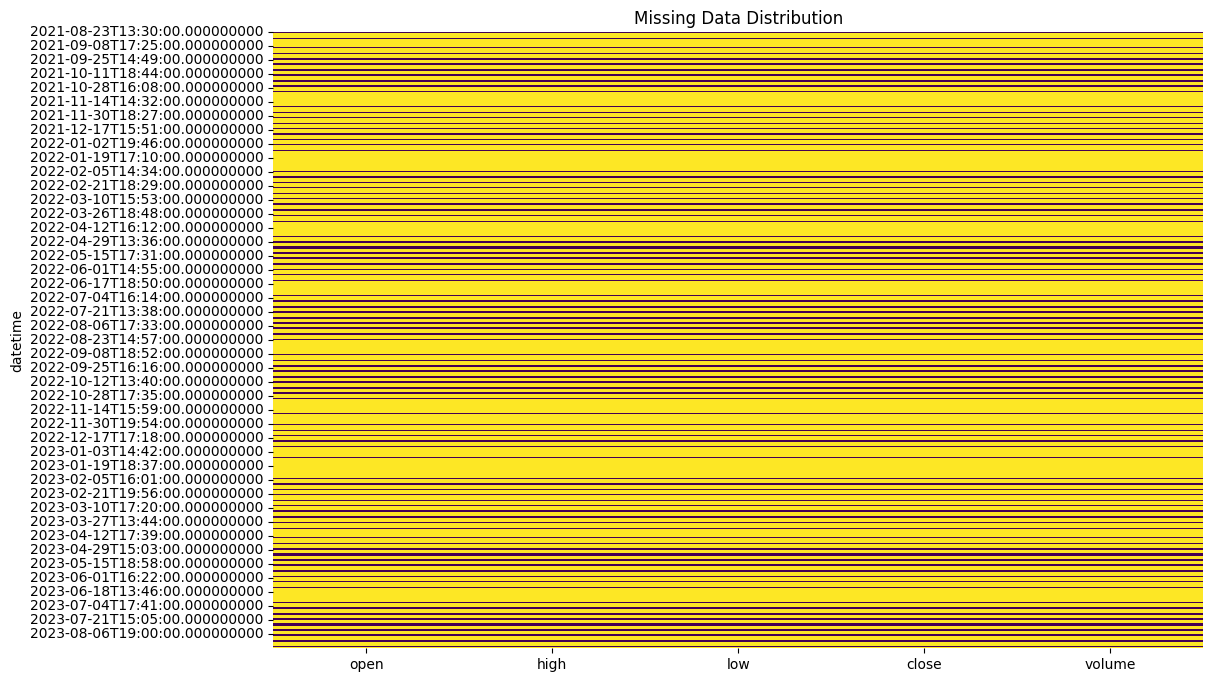

In [48]:
#####
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the missing values for each column
missing_values = df_market_hours.isna().sum()
print("Missing values distribution:")
print(missing_values)

# Visualize the missing data using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_market_hours.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Distribution")
plt.show()

In [49]:
######
# Identify rows with any missing values
missing_rows = df_market_hours[df_market_hours.isna().any(axis=1)]

# Extract dates and times for missing rows
missing_dates_times = missing_rows.index

# Print some of the missing dates and times
print("Some missing dates and times:")
print(missing_dates_times[:50]) # Adjust to show more or fewer entries


Some missing dates and times:
DatetimeIndex(['2021-08-23 12:00:00-04:00', '2021-08-23 12:01:00-04:00',
               '2021-08-23 12:02:00-04:00', '2021-08-23 12:03:00-04:00',
               '2021-08-23 12:04:00-04:00', '2021-08-23 12:05:00-04:00',
               '2021-08-23 12:06:00-04:00', '2021-08-23 12:07:00-04:00',
               '2021-08-23 12:08:00-04:00', '2021-08-23 12:09:00-04:00',
               '2021-08-23 12:10:00-04:00', '2021-08-23 12:11:00-04:00',
               '2021-08-23 12:12:00-04:00', '2021-08-23 12:13:00-04:00',
               '2021-08-23 12:14:00-04:00', '2021-08-23 12:15:00-04:00',
               '2021-08-23 12:16:00-04:00', '2021-08-23 12:17:00-04:00',
               '2021-08-23 12:18:00-04:00', '2021-08-23 12:19:00-04:00',
               '2021-08-23 12:20:00-04:00', '2021-08-23 12:21:00-04:00',
               '2021-08-23 12:22:00-04:00', '2021-08-23 12:23:00-04:00',
               '2021-08-23 12:24:00-04:00', '2021-08-23 12:25:00-04:00',
               '2021-

In [24]:
# Resample to 1-minute intervals, leaving NaN for missing data
df_resampled = df.resample('1T').asfreq()
df_resampled.head()

,open,high,low,close,volume
datetime,,,,,
2021-08-23 09:30:00,148.47501,148.49001,148.47501,148.49001,1929993
2021-08-23 09:31:00,148.50000,148.80000,148.50000,148.57001,468210
2021-08-23 09:32:00,148.50000,148.62000,148.22000,148.36000,401148
2021-08-23 09:33:00,148.36000,148.41901,148.17000,148.19000,292025
2021-08-23 09:34:00,148.19000,148.25000,147.97000,148.16000,480851


In [25]:
# Filter market hours (9:30 to 16:00)
df_market_hours = df_resampled.between_time('09:30', '16:00')
df_market_hours.head()

,open,high,low,close,volume
datetime,,,,,
2021-08-23 09:30:00,148.47501,148.49001,148.47501,148.49001,1929993
2021-08-23 09:31:00,148.50000,148.80000,148.50000,148.57001,468210
2021-08-23 09:32:00,148.50000,148.62000,148.22000,148.36000,401148
2021-08-23 09:33:00,148.36000,148.41901,148.17000,148.19000,292025
2021-08-23 09:34:00,148.19000,148.25000,147.97000,148.16000,480851


Missing values distribution:
open      89512
high      89512
low       89512
close     89512
volume    89512
dtype: int64


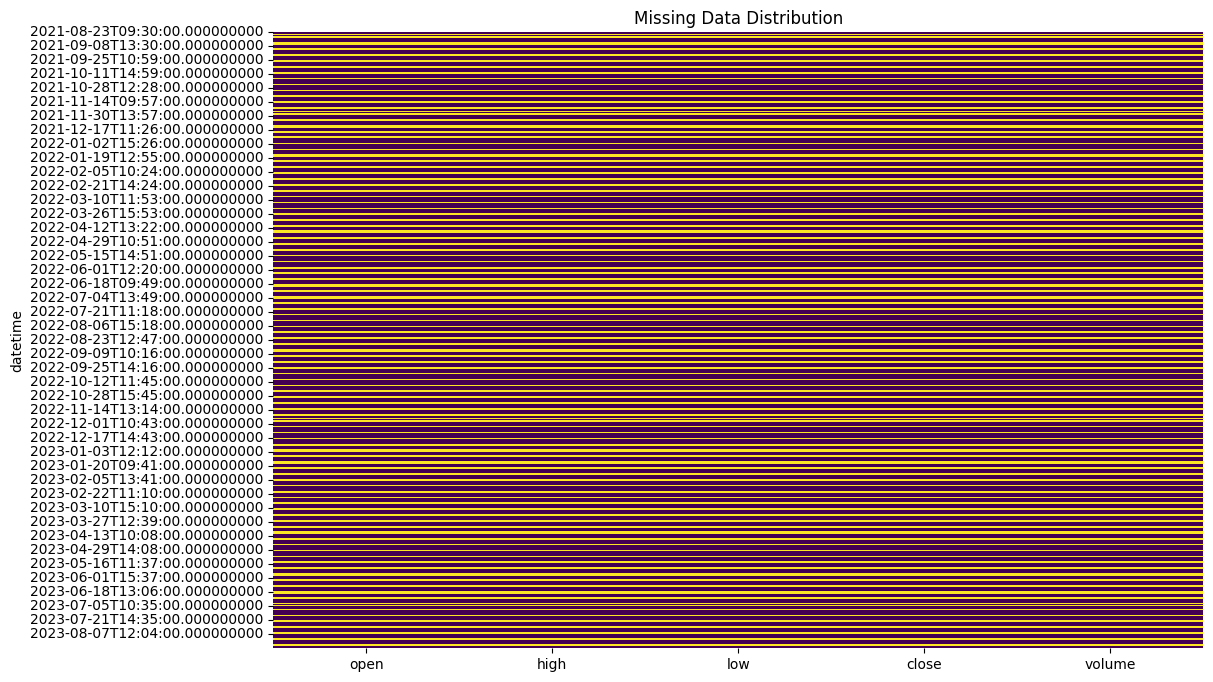

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the missing values for each column
missing_values = df_market_hours.isna().sum()
print("Missing values distribution:")
print(missing_values)

# Visualize the missing data using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_market_hours.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Distribution")
plt.show()

In [27]:
# Identify rows with any missing values
missing_rows = df_market_hours[df_market_hours.isna().any(axis=1)]

# Extract dates and times for missing rows
missing_dates_times = missing_rows.index

# Print some of the missing dates and times
print("Some missing dates and times:")
print(missing_dates_times[:50]) # Adjust to show more or fewer entries


Some missing dates and times:
DatetimeIndex(['2021-08-23 16:00:00', '2021-08-24 16:00:00',
               '2021-08-25 13:37:00', '2021-08-25 13:38:00',
               '2021-08-25 13:39:00', '2021-08-25 13:40:00',
               '2021-08-25 13:41:00', '2021-08-25 13:42:00',
               '2021-08-25 13:43:00', '2021-08-25 16:00:00',
               '2021-08-26 16:00:00', '2021-08-27 16:00:00',
               '2021-08-28 09:30:00', '2021-08-28 09:31:00',
               '2021-08-28 09:32:00', '2021-08-28 09:33:00',
               '2021-08-28 09:34:00', '2021-08-28 09:35:00',
               '2021-08-28 09:36:00', '2021-08-28 09:37:00',
               '2021-08-28 09:38:00', '2021-08-28 09:39:00',
               '2021-08-28 09:40:00', '2021-08-28 09:41:00',
               '2021-08-28 09:42:00', '2021-08-28 09:43:00',
               '2021-08-28 09:44:00', '2021-08-28 09:45:00',
               '2021-08-28 09:46:00', '2021-08-28 09:47:00',
               '2021-08-28 09:48:00', '2021-08-28 09:49

In [28]:
######
import pandas_market_calendars as mcal

# Define the market calendar (e.g., NYSE)
nyse_cal = mcal.get_calendar('XNYS')

# Get market open/close times for the range of your data
market_open_close = nyse_cal.schedule(start_date=df_market_hours.index.min(), end_date=df_market_hours.index.max())

# Get a DatetimeIndex that includes only market hours
market_hours = mcal.date_range(market_open_close, frequency='1T')

# Use the market_hours index to reindex df_filled, filling missing values
df_final = df_market_hours.reindex(market_hours)

Missing values distribution:
open      196020
high      196020
low       196020
close     196020
volume    196020
dtype: int64


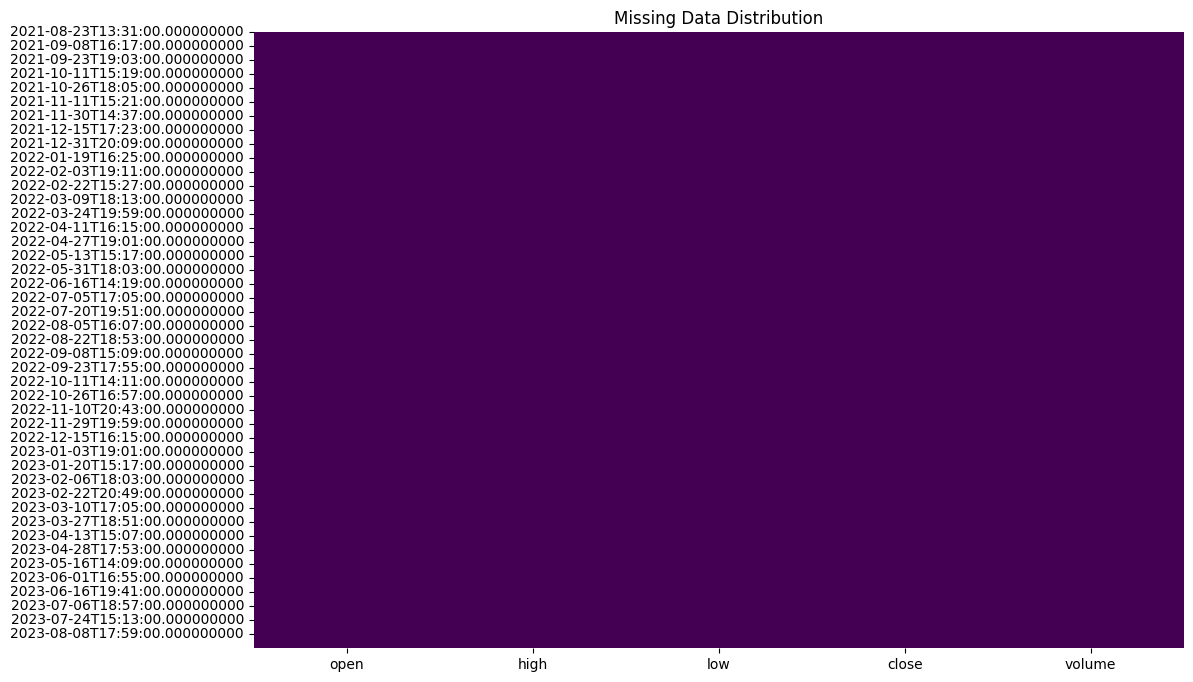

In [29]:
# Calculate the missing values for each column
missing_values = df_final.isna().sum()
print("Missing values distribution:")
print(missing_values)

# Visualize the missing data using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_final.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Distribution")
plt.show()

In [30]:
# Identify rows with any missing values
missing_rows = df_final[df_final.isna().any(axis=1)]

# Extract dates and times for missing rows
missing_dates_times = missing_rows.index

# Print some of the missing dates and times
print("Some missing dates and times:")
print(missing_dates_times[:50]) # Adjust to show more or fewer entries

Some missing dates and times:
DatetimeIndex(['2021-08-23 13:31:00+00:00', '2021-08-23 13:32:00+00:00',
               '2021-08-23 13:33:00+00:00', '2021-08-23 13:34:00+00:00',
               '2021-08-23 13:35:00+00:00', '2021-08-23 13:36:00+00:00',
               '2021-08-23 13:37:00+00:00', '2021-08-23 13:38:00+00:00',
               '2021-08-23 13:39:00+00:00', '2021-08-23 13:40:00+00:00',
               '2021-08-23 13:41:00+00:00', '2021-08-23 13:42:00+00:00',
               '2021-08-23 13:43:00+00:00', '2021-08-23 13:44:00+00:00',
               '2021-08-23 13:45:00+00:00', '2021-08-23 13:46:00+00:00',
               '2021-08-23 13:47:00+00:00', '2021-08-23 13:48:00+00:00',
               '2021-08-23 13:49:00+00:00', '2021-08-23 13:50:00+00:00',
               '2021-08-23 13:51:00+00:00', '2021-08-23 13:52:00+00:00',
               '2021-08-23 13:53:00+00:00', '2021-08-23 13:54:00+00:00',
               '2021-08-23 13:55:00+00:00', '2021-08-23 13:56:00+00:00',
               '2021-

In [ ]:
######
# Forward fill any remaining missing values
df_final = df_final.ffill()

# Now df_final is your preprocessed DataFrame, excluding weekends and holidays
print(df_final.head())

In [9]:
# Forward fill missing values within each day
df_filled = df_market_hours.groupby(df_market_hours.index.date).apply(lambda x: x.ffill())

# Now df_filled is your preprocessed DataFrame
df_filled.head()

,open,high,low,close,volume
datetime,,,,,
2021-08-23 09:30:00,148.47501,148.49001,148.47501,148.49001,1929993
2021-08-23 09:31:00,148.50000,148.80000,148.50000,148.57001,468210
2021-08-23 09:32:00,148.50000,148.62000,148.22000,148.36000,401148
2021-08-23 09:33:00,148.36000,148.41901,148.17000,148.19000,292025
2021-08-23 09:34:00,148.19000,148.25000,147.97000,148.16000,480851
